# <u>**Black Holes and the Fate of Galaxies**</u>
#### Written by Stéphanie Juneau, National Optical Astronomy Observatory, and Elliot Kisiel, University of Arizona

<br>
Black holes are among the most mysterious objects in our universe. What are they? How do we find them? You will get to learn about different kinds of black holes, and apply research tools to discover their telltale signatures in astronomical observations. As the power-engine of quasars (which themselves are bright beacons that we can see far in the universe), you will learn how the largest black holes might change the fate of the galaxies they live in.

## How to use this notebook (adapted from Gautham Narayan)

The webpage you are in is actually an app - much like you'd run on your cellphone. This app consists of cells. 

Each "input" cell (something with an "In" to the left) contains code, or instructions to make the computer do something.

You can <u>**modify the code by typing into the cell when specified.**</u>

You <u>**execute a cell with Shift+Enter**</u> on the keyboard - this makes the computer execute your instructions. That's what this app does! 

You can try it for yourself at https://try.jupyter.org/ outside of the cafe!

In [1]:
# Execute this cell (Shift+Enter) to compile the software that we will use for our activity
from __future__ import print_function
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
from matplotlib.collections import PatchCollection
plt.style.use('ggplot')



from collections import OrderedDict
import numpy as np
import astropy.units as u
from astropy.units import imperial
from IPython.display import display
from ipywidgets import interactive, interact, FloatSlider

# What are Black Holes?

Black holes are astronomical objects that exert a extreme force of gravity due to their very high density and/or mass. If we describe gravity as the bending of the space, black holes bend space so strongly that there is a distance inside which even rays of light fall into the "well" by following the curvature. This distance corresponds to the "event horizon" of the black hole, and we cannot see or recover any information from what is inside this horizon.

<br>
<figure>
<img src="Figures/grav_well_illustration.jpg", align="center", width=800>
<figcaption><b>Figure 1:</b> Illustration of the concept of gravity corresponding to the bending of space-time. This is predicted by Einstein's theory of general relativity. Black holes are the most extreme case with a bending so strong that even light cannot escape. This illustration is a cartoon version but we have to imagine space is already in 3D and so this "bending" goes in all directions around all objects with a mass.   
Image credit: Cetin Bal.</figcaption>
</figure>

# How do we find Black Holes?

We cannot *see* black holes directly because no light comes out of them. However, we can find them because their gravitational pull affects anything that comes close. For instance, we can use telescopes to observe stars orbiting around them, such as the supermassive black hole _Sagittarius A*_ (pronouced A-star) at the center of our galaxy. The animation below shows the stars as they go around the center of the galaxy. We cannot see much of what they are orbiting around, but from the shape and speeds of the orbit, astronomers were able to calculate that the central dark object has a mass between 3 and 4 million times that of the Sun. Because that's a lot of mass in this small space, the only possible explanation is a supermassive black hole.

<br>
<figure>
<img src="Figures/stars_sag_astar.gif", align="center", width=500>
<figcaption><b>Figure 2:</b> Orbits of stars around Sagittarius A* - the supermassive black hole at the center of our Milky Way galaxy. <b>Animation credit:</b> Keck, UCLA galactic center group, Ghez et al</figcaption>
</figure>

Another way to find supermassive black holes is when there is a lot of material, such as interstellar gas, swirling around them. As this gaseous material swirls around the *gravitational well*, it takes the shape of a flatened disk that glows really brightly thanks to its extremely hot temperature. So while we still cannot see the black hole itself, we can observe the bright glow from the surrounding *accretion disk*. When this happens, it creates what astronomers call an Active Galactic Nucleus (AGN) at the center of the galaxy. The most luminous AGN are called *quasars*. In quasars, the central point of light from the active nucleus is so luminous that it outshines the entire galaxy and its hundred billion stars.

<br>
<figure>
<img src="Figures/PIA20051.jpg", align="center", width=500>
<figcaption><b>Figure 3:</b> Artist illustration of a supermassive black hole surrounded by a swirling disk of material falling onto it, which is called the <i>accretion disk</i>. The purplish ball of light above the black hole, a feature called the corona, contains highly energetic particles that generate X-ray light. If you could view the corona with your eyes, it would appear nearly invisible since we can't see its X-ray light. Even higher energy than X-ray light, <b>Gamma-ray light</b> can be emitted by material moving extremely fast along a jet. <b>Image credit:</b> NASA/JPL-Caltech.</figcaption>
</figure>

# What happens when black holes “flare”? How big is the flare and how much energy is in there?

## The story of the quasar 3C 279

*Five billion years ago, a great disturbance rocked a region near the monster black hole at the center of galaxy 3C 279. On June 14, 2015 the pulse of high-energy light produced by this event finally arrived at Earth, setting off detectors aboard NASA’s Fermi Gamma-ray Space Telescope and other satellites.*

*“One day 3C 279 was just one of many active galaxies we see, and the next day it was the brightest thing in the gamma-ray sky,” said Sara Cutini, a Fermi Large Area Telescope scientist.*


<br>
<figure>
<img src="Figures/quasar-3c379-artistview.jpg", align="center", width=500>
<figcaption><b>Figure 4:</b> Artist rendering showing a glowing disk of material swirling around a supermassive black hole (which we cannot see, but it would be located behind the bright spot at the inner part of the disk). The "Real Image" shows the view in Gamma rays - a type of light with even higher energy than X-rays - as seen with a Gamma-ray telescope. <b>Image Credits:</b> EGRET Team, Compton Observatory, NASA. </figcaption>
</figure>

Below, we will look at real data from the 3C 279 quasar in order to measure the size of a flare, and the amount of energy emitted during the flare. 

### <b> <font color='blue'> Q: How do you think astronomers measure the size of something that we cannot reach nor <i>zoom in</i> to observe in details? </font> </b>

<br>
<figure>
<img src="Figures/Stop_sign_grey.jpg", align="center", width=400>
<figcaption></figcaption>
</figure>

# Using Light to Measure Sizes

First, let's see how we can use light (more specifically light travel time) to measure sizes and distances. It works because light has a specific travel speed. It's very fast but not infinite!

Light travels at 300,000 km/s.<br>
*Wait, how fast is that in miles per hour (mph)?* <b> <font color='red'> Hit Shift+Return in the next cell below to print the numbers.</font></b>

In [2]:
c = 3e5 *u.kilometer/u.second
print("The Speed of light in km/s is",c.value)

mph = imperial.mile / u.hour
print("The speed of light in mph is",np.round(c.to(mph).value,1))

print("The speed of light in *Million* miles-per-hour:",np.round(c.to(mph).value/1e6,1))


The Speed of light in km/s is 300000.0
The speed of light in mph is 671080887.6
The speed of light in *Million* miles-per-hour: 671.1



### Define functions to compute and plot light travel distance
<b> <font color='red'> Hit Shift+Return in the next cell below to define the functions.</font></b>

In [3]:
def light_travel_size(traveltime):
    c = 3e5 *u.km/u.second
    dist = c*traveltime.to(u.second)
    return dist #in km

def plot_travel_dist(travel_dist):

    # Define unit of "Billion km"
    Gkm = 1e9*u.km

    # Size of Solar System
    solarsystem_radius = 18*Gkm   #defined as the Heliosphere

    fig = plt.figure(figsize=(16,11))
    ax1 = fig.add_subplot(211)
    ax2 = fig.add_subplot(212)
    fig.subplots_adjust(top=0.8,hspace = 0.4)
    
    zero = 0.00001
    r_planetorbits = [57.95, 108.11, 149.57, 227.84, 778.14, 1427, 2870.3, 4499.9, 5913.]*(1e-3*Gkm)
    planetnames = ['Mercury','Venus','Earth','Mars','Jupiter','Saturn','Uranus','Neptune','Pluto']

    xx = np.arange(0,6e9,1e8)/1e9*Gkm
    for i, ri in enumerate(r_planetorbits):
        circle = Circle((0,0),ri.to(Gkm).value,color='b',fill=False)
        ax1.add_artist(circle)
        ax1.text(ri.to(Gkm).value,0.5,planetnames[i],rotation='vertical',fontsize=11)
        
    distance_to = travel_dist.value /1e9
    ax1.plot([0,distance_to],[0,0],zorder=2,c='green',linewidth=6, markersize=12) #marker=5
    ax1.set_ylim(-0.75,0.75)
    ax1.set_xlabel('Distance (billion km)',fontsize=15)
    ax1.set_xlim(0,6)
    ax1.set_yticklabels('')
    ax1.set_title('Light travel path inside the Solar System',fontsize=16,color='green')
    
    # Proxima Centauri is the closest star to the Sun
    proxima_cen = 4.22*u.lyr
    prox_cen_ss = proxima_cen.to(u.km) / solarsystem_radius
    ax2.axvline(prox_cen_ss,color='purple')
    ax2.scatter(prox_cen_ss,0,color='purple',marker='*',s=1000)
    ax2.text(0.97*prox_cen_ss,8,'Proxima Centauri',rotation='vertical',fontsize=13)

    # Add Oort Cloud, which extends beyond the Solar System Heliosphere
    oort_inner = 200.*u.AU
    oort_inner_ss = oort_inner.to(u.km) / solarsystem_radius
    oort_outer = 200000.*u.AU
    oort_outer_ss = oort_outer.to(u.km) / solarsystem_radius
    ax2.fill([oort_inner_ss,oort_outer_ss,oort_outer_ss,oort_inner_ss], \
             [-10,-10,10,10], fill=False, hatch='\\',color='orange')
    ax2.text(500,7.5,'Oort Cloud',fontsize=14,color='tomato')

    
    distance_norm = travel_dist.value / solarsystem_radius.value
    ax2.plot([0,distance_norm],[0,0],zorder=2,c='green',linewidth=6, markersize=12) #marker='>'
    ax2.set_xlabel('Distance (Solar System; where 1 Solar System is roughly 18 billion km)',fontsize=15)
    ax2.set_ylim(-10,10)
    ax2.set_xlim(0,2300)
    ax2.set_yticklabels('')
    ax2.set_title('Light travel path beyond the Solar System',fontsize=16,color='green')

    plt.show()

## Interactive plot to visualize the light travel distances relative to the Solar System
    
### <b> <font color='blue'> Q: How far does light travel in 8 minutes? How long does light need to reach all the way to the orbit of Pluto? </font> </b>

<b> <font color='red'> Hit Shift+Return in the cell below to show the plot. Then select from the drop-down menu values of light travel time.</font></b>

In [4]:
traveltimes = [1*u.minute, 8.*u.minute, 3.*u.hour, 5.45*u.hour, 1.*u.day, 1.*u.week, 1.*u.year, 4.22*u.year]
travelDist = OrderedDict((str(times), light_travel_size(times)) for times in traveltimes)

interactive_plot = interactive(plot_travel_dist, travel_dist = travelDist)
display(interactive_plot)

interactive(children=(Dropdown(description=u'travel_dist', options=OrderedDict([('1.0 min', <Quantity 18000000. km>), ('8.0 min', <Quantity 1.44e+08 km>), ('3.0 h', <Quantity 3.24e+09 km>), ('5.45 h', <Quantity 5.886e+09 km>), ('1.0 d', <Quantity 2.592e+10 km>), ('1.0 wk', <Quantity 1.8144e+11 km>), ('1.0 yr', <Quantity 9.46728e+12 km>), ('4.22 yr', <Quantity 3.99519216e+13 km>)]), value=<Quantity 18000000. km>), Output()), _dom_classes=('widget-interact',))

### The size of the Solar System is defined by the "heliopause", which is about 3 times further than the distance to Pluto. The heliopause is the balance point where the pressure from the solar wind is equivalent to that of the interstellar medium (the "stuff" between the stars).

# <u>**Activity 1: How big is the flare of 3C 279?**</u>

Now that we have seen that we can measure sizes with the light travel time, let's see how this applies to a flare from a quasar!

<br>
<figure>
<img src="Figures/agnguide10a_flare_size.jpg", align="center", width=500>
<figcaption><b>Figure 5:</b> Illustration of the difference in light-travel time between the far-edge, middle, and near-edge of a source. If there were a sudden flash of light (a flare), the light would take more time to travel from the far side compared to the middle and near side of the object that has the flare. The difference in travel time between the far side and near side tells us how fast the total light can possibly vary (either rise to a peak, or drop back down to the normal level). In the artist illustration above, the radius (from center to one edge) takes one week in light travel time, so it has a maximum size of one <i>light-week</i>, which means 181.44 billion km. The diameter is two light-weeks, or 362.88 billion km.
</figcaption>
</figure>

In [5]:
print('1 light-week is',light_travel_size(1.*u.week)/1e9/u.km,'billion km')
print('2 light-weeks is',light_travel_size(2.*u.week)/1e9/u.km,'billion km')

1 light-week is 181.44 billion km
2 light-weeks is 362.88 billion km


### Let's look at some real data!

The quasar <b>3C 279</b> was observed with the Fermi satellite to monitor it's brightness in gamma-ray light over many years. First, let's look at real astronomical data taken by the EGRET gamma-ray instrument that was onboard NASA’s Compton Gamma Ray Observatory.

The next cell will make a figure of the measurements of gamma-ray photon flux as a function of time:
* The <b>photon flux</b> is the number of photons per second per square meter
* The <b>time</b> is given by the day in the year 1991 (counting days from 1 to 365)

The graph below will show the data with error bars for a flare observed in 1991. <b> <font color='red'> Hit Shift+Return in the next 2 cells below to make the graph with the data.</font></b>


In [6]:
# define the function that will make a figure with the data
def plot_data_3c279():
    days = [167.5, 168.5, 169.5, 170.5, 171.5, 172.5, 173.5, 174.5, 175.5, 176.5, 177.5, 178.5, 179.5]
    flux = [1.4,     1.7,   2.0,   2.7,   2.2,   3.4,   3.9,   3.1,   4.0,   4.5,   2.9,   1.6,   1.1]
    flux_err = 0.5

    plt.figure(figsize = (8,6))
    plt.scatter(days,flux,s=15)
    plt.errorbar(days,flux, yerr=flux_err, xerr=0.5, fmt='none', ecolor='red', elinewidth=1, \
                 capsize=2, barsabove=True)
    plt.xlabel('Day of 1991',fontsize=14)
    plt.ylabel('Flux [$10^{-2}\ photons\ m^{-2}\ s^{-1}$]',fontsize=14)

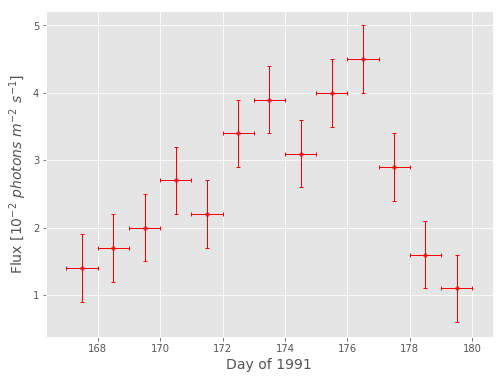

In [7]:
# make the figure with the data by calling the function
plot_data_3c279()

### <b> <font color='blue'> Q: How long did the flare last? </font> </b> Compute separately the <i>rising time</i>, and the <i>dropping time</i> with the graph below by adjusting the sliders. 
<b> <font color='red'> Hit Shift+Return in the next 2 cells below to make the plot with the data and the sliders!</font></b>

In [8]:
def finding_values(rise_begin, rise_end, drop_begin, drop_end):
    plot_data_3c279()
    plt.axhline(1.25,color='blue')  #normal level (leave this one unchanged)

    # Use two vertical solid lines to measure the rise time from normal to peak 165 - 180 in 0.1
    plt.axvline(rise_begin,color='green')  #beginning of the rise (from normal)
    plt.axvline(rise_end,color='green')  #end of the rise (at peak)

    # Use two vertical dashed lines to measure the drop time from peak back down to normal
    plt.axvline(drop_begin,color='purple',linestyle='dashed')  #beginning of the drop (from peak)
    plt.axvline(drop_end,color='purple',linestyle='dashed')  #end of the drop (back to normal)

In [9]:
interactive_plot2 = interactive(finding_values, \
                                rise_begin = FloatSlider(min=166.8, max=185.0, step=0.05, value = 166.8, continuous_update=False), \
                                rise_end   = FloatSlider(min=166.8, max=185.0, step=0.05, value = 166.9, continuous_update=False), \
                                drop_begin = FloatSlider(min=167.0, max=185.0, step=0.05, value = 167.0, continuous_update=False), \
                                drop_end   = FloatSlider(min=167.0, max=185.0, step=0.05, value = 167.1, continuous_update=False)) 
display(interactive_plot2)

interactive(children=(FloatSlider(value=166.8, continuous_update=False, description=u'rise_begin', max=185.0, min=166.8, step=0.05), FloatSlider(value=166.9, continuous_update=False, description=u'rise_end', max=185.0, min=166.8, step=0.05), FloatSlider(value=167.0, continuous_update=False, description=u'drop_begin', max=185.0, min=167.0, step=0.05), FloatSlider(value=167.1, continuous_update=False, description=u'drop_end', max=185.0, min=167.0, step=0.05), Output()), _dom_classes=('widget-interact',))

In the graph above, the <font color='blue'> horizontal blue line</font> is the "normal" level. You will have to estimate when the flux starts rising to the peak, and when it goes back down to the normal level taking into account the error bars.

After selecting the four values (rise_begin, rise_end, drop_begin, drop_end) write down your values on the post-its on the table and click on the next cell to preserve the values above.

<b><font color='red'> Enter the duration of the flare's "rise" time and the flare's "drop" time in the cell below. </font></b>

In [10]:
rise_time = 1.0*u.day   ### REPLACE 1.0 with your measurements !
drop_time = 1.0*u.day   ### REPLACE 1.0 with your measurements !

<b><font color='red'> Is the rise time or drop time shorter? Enter the shorter time in the cell below. </font></b>

In [11]:
# Replace the value 1.0 with the shortest between the rise time and drop time
shortest_time = 3.0*u.day  ### REPLACE 1.0 with your shortest measurement

In [12]:
# This cell calls the function to convert a light travel time to a distance
flare_size = light_travel_size(shortest_time)
print('The flare size is ',flare_size.value/1e9,'billion km')

The flare size is  77.76 billion km





### <b> <font color='blue'> Q: How large is the flare relative to the Solar System? Do you expect it to be larger or smaller, and why? </font> </b>

In [13]:
# Size of Solar System
solarsystem_radius = 18e9*u.km
solarsystem_size   = 2.*solarsystem_radius # diameter
print('Flare size in Solar System units: ',flare_size/solarsystem_size)

Flare size in Solar System units:  2.16


# <u>**Activity 2: How much energy is in the flare?**</u>

In this activity, we will calculate the energy emitted in the flare. First, you will read the flux from the graph, and the next steps will guide you through the conversion. We will compare to the energy of the Sun, and of an entire galaxy!

### <b> <font color='blue'> Q: How bright is the flare at maximum in terms of photon flux? </font> </b>


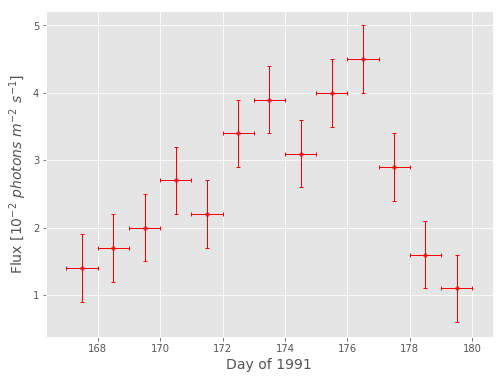

In [14]:

# Let's make the figure again with the data by calling the function
plot_data_3c279()

<b><font color='red'> Enter the value of the peak flux from the graph (replace the number 1.0). </font></b>

In [15]:

peak_flux = 4.5 * 1e-2 * u.ph *(u.m**-2) *u.second**-1   #in units of 10^-2 photons/second/square meter
print('Peak photon flux is',peak_flux.value,'photons per second per square meters')

Peak photon flux is 0.045 photons per second per square meters


### Convert from photon Flux to Luminosity (= Energy/second)

The flux is the amount of energy hitting a square meter here on Earth. The total energy emitted by the flare
every second is spread out over a sphere centered on the flare, with a radius equal to the distance from the Earth to the flare.

<br>
<figure>
<img src="Figures/Lum_flux_earth.jpeg", align="center", width=500>
<figcaption><b>Figure 6:</b> Illustration to show the relationship between the luminosity of a light source (such as a flare, a star, etc.) which is the energy per second, to the flux observed at a distance <b>r</b> from the source, which is the energy per second per square meter.
</figcaption>
</figure>



The distance to 3C279 is about $4 \times 10^9 light years$, and there are $9.5 \times 10^{15} m$ in a light year. The surface area of a sphere is $A= 4πr^2$ where $r$ is the radius of the sphere. 


#### The function below will apply the conversion to go from photon flux to energy flux (energy per second per square meter) to luminosity (total energy emitted per second). <b> <font color='red'> Hit Shift+Return to compile the function so that we can call it later.</font></b>

In [16]:
def compute_lum(peak_flux):
    #convert from photon flux to energy flux in Gev/square-meter/second
    peak_energy_flux = peak_flux* 1.*u.GeV/u.ph
    #convert to Joule/square-meter/second
    peak_energy_flux_J = peak_energy_flux.to(u.J/u.m**2/u.second)
    
    #### Let's calculate total surface area of the sphere (from 3C 279)
    r = 4e9 * 9.5e15 *u.m  #radius is the distance to 3C 279 converted to meter
    area = 4.*np.pi*r**2
    
    #The total luminosity (energy/second) emitted in the flare each second
    #is given by L = (Area) x (Flux).

    #### Let's calculate the luminosity (energy/sec) in Joules/sec.
    Luminosity = area*peak_energy_flux_J

    Luminosity_Sun = 4e26 *u.J/u.second
    Luminosity_rel_to_Sun = Luminosity / Luminosity_Sun
    return(Luminosity_rel_to_Sun)

### <b> <font color='blue'> Q: How much energy does the flare emit relative to the Sun? Do you expect it to be more or less, and why? </font> </b>

<br>
<figure>
<img src="Figures/Stop_sign_grey.jpg", align="center", width=400>
<figcaption></figcaption>
</figure>

<b><font color='red'> Hit Shift+Return in the cell below to calculate the ratio of the luminosity at the flare maximum to the solar luminosity. </font></b>

In [17]:
Luminosity_rel_to_Sun = compute_lum(peak_flux)
print('Relative to the Sun, the luminosity is',Luminosity_rel_to_Sun,'times brighter.')
print("*** That's ",np.round(Luminosity_rel_to_Sun / 1e12,1),"trillion times brighter than the Sun! ***")


Relative to the Sun, the luminosity is 3.27069441882e+14 times brighter.
*** That's  327.1 trillion times brighter than the Sun! ***


### <b> <font color='blue'> Q: How many years would it take to the Sun to produce the same amount of energy as the flare in one second?</font> </b>

There are about 30 million ($3 \times 10^7$) seconds in a year. How many years would it take for the Sun to emit as much energy as the flare did in a single second?

In [18]:
Luminosity_Sun = 4e26 *u.J/u.second
Energy_flare = Luminosity_rel_to_Sun * Luminosity_Sun * 1*u.second #Energy from flare in 1 second
time_Sun = Energy_flare / Luminosity_Sun
print('Time it would take the Sun to produce same energy as the flare did in a single second: ')
print('    ',np.round(time_Sun.to(u.yr),1))
print("--> That's",np.round(time_Sun.to(u.Myr).value,2),'millions of years')

Time it would take the Sun to produce same energy as the flare did in a single second: 
     10364205.2 yr
--> That's 10.36 millions of years


### <b> <font color='blue'> Q: How much energy does the flare emit relative to the entire Milky Way galaxy? Do you expect it to be more or less, and why? </font> </b>

<br>
<figure>
<img src="Figures/Stop_sign_grey.jpg", align="center", width=400>
<figcaption></figcaption>
</figure>

<b><font color='red'> Hit Shift+Return in the cell below to calculate the ratio of the luminosity at the flare maximum to the Milky Way galaxy luminosity. </font></b>
(<b>Hint</b>: The Milky Way is about as luminous as 30 billion Suns)

In [19]:
Luminosity_rel_to_MW =  Luminosity_rel_to_Sun / 30e9
print('Relative to the Milky Way, the luminosity is',np.round(Luminosity_rel_to_MW),'times higher!')

Relative to the Milky Way, the luminosity is 10902.0 times higher!


# <u> **Conclusion: How can black holes change the fate of galaxies?** </u>

### <b> <font color='blue'> Q: What do you think could happen to galaxies when their central black hole produces an Active Galactic Nucleus? and an energetic flare? </font> </b>

<br>
<figure>
<img src="Figures/Supermassive-Black-Hole-Winds_ESA_ATG_medialab.jpg", align="center", width=500>
<figcaption><b>Figure 6:</b> Artist illustration of a galaxy that harbors an active galactic nucleus powered by a supermassive black hole. The AGN powers fast and hot winds of materials pushing gas and dust out of the galaxy. These winds could potentially influence the galaxy by removing the gas needed to form new stars. <b>Image credit:</b> ESA/ATG medialab.</figcaption>
</figure>

As you have seen, Active Galactic Nuclei are powered by supermassive black holes and they can emit A LOT of energy. Potentially, this energy can affect the galaxy because it can create winds that remove (or heat) the gas of the galaxy. If the gas is lost or if it is too hot, it's not longer available to form new stars. This means that the galaxy in question will stop forming new stars and it will gradually age and fade. However, astronomers are still not sure of the effects because in some cases, it seems that the energy just gets out of the galaxy or that the galaxy has some way of protecting itself. This is an ongoing and active field of research. <b>Maybe one day <i>you</i> can help to solve this mystery!</b>

## Links to learn more

* Interesting video called **The Black Hole Tipping Point** on [YouTube](https://www.youtube.com/watch?v=brmjWYQi2UM)
* Animation of Gamma Rays as Raindrops on the [Astronomy Picture of the Day](https://apod.nasa.gov/apod/ap150722.html)
* The story of 3C 279 comes from [this article](https://futurism.com/nasa-spots-record-breaking-black-hole-flare). Below is a picture made with the Gamma ray "Fermi Large Area Telescope" that shows how bright (in Gamma rays) the quasar 3C 279 was during its historic flare of 2015.

<br>
<figure>
<img src="Figures/3C-279-Outburst.jpg", align="center", width=500>
<figcaption><i>The brightest persistent source in the gamma-ray sky is the Vela pulsar, which is about 1,000 light-years away. 3C 279 is millions of times farther off, but during this flare it became four times brighter than Vela. This corresponds to a tremendous energy release, and one that cannot be sustained for long. The galaxy dimmed to normal gamma-ray levels by June 18, 2015. 3C 279’s historic flare can be seen in this image from the Large Area Telescope. Gamma rays within the range of 100 million to 100 billion electron volts are specifically shown</i> (Image Credit: NASA/DOE/Fermi LAT Collaboration) </figcaption>
</figure>

## Other Credits

Some of this activity was adapted from NASA's Active Galaxies Educator's Guide with Activities in Science and Mathematics (Activity 3: Light Travel Time and the Size of Active Galaxies).

## More on the flux, energy & luminosity calculations

If we know the energy of each photon, we can convert the flux in number of photons per second per square meter area (the units above) to the <b>energy flux</b> in energy (electronVolt = eV) per second per square meter. 

For reference on the units of energy:
* $1 eV = 1.6021766×10^{−19} J$ (Joule)
* $1 GeV = 1\ billion\ eV = 1.6021766×10^{−10} J$ (Joule)

Below, we assume that each gamma ray hitting the detector has an energy of 1 GeV (= 1 billion eV), and calculate the maximum energy flux in $GeV m^{-2} s^{-1}$.